In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind as t_test
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt


replace the Slovenia variable name datum to a English name

In [2]:
df = pd.read_excel('E:/luwen/kuleuvenslides/2nd Semester/2 MDA/1298/Podatki_Podravje_temp_postaja_311.xlsx')
df['date'] = pd.to_datetime(df['datum'])
df = df[~(df['date'] < '2012-01-01')]
df=df.drop(columns=['datum'])
df = df.reset_index(drop=True)
display(df)
df.to_excel("temperature.xlsx", index=False)

,postaja,t7,t14,t21,tpov,tmax,tmin,date
0,311,-0.6,4.5,0.3,1.1,5.7,-1.3,2012-01-01
1,311,-1.6,11.0,9.3,7.0,11.4,-2.3,2012-01-02
2,311,5.8,8.0,5.4,6.2,10.5,3.2,2012-01-03
3,311,0.4,9.2,2.6,3.7,10.2,0.0,2012-01-04
4,311,2.9,7.0,3.7,4.3,7.3,-1.9,2012-01-05
...,...,...,...,...,...,...,...,...
3283,311,-5.4,-0.3,-1.2,-2.0,-0.3,-5.8,2020-12-27
3284,311,0.9,2.3,1.4,1.5,3.0,-1.3,2020-12-28
3285,311,6.0,5.4,5.2,5.4,6.9,0.6,2020-12-29
3286,311,2.9,8.5,4.0,4.8,8.5,1.8,2020-12-30


In [3]:
temperature_data=pd.read_excel("temperature.xlsx")
temperature_data

,postaja,t7,t14,t21,tpov,tmax,tmin,date
0,311,-0.6,4.5,0.3,1.1,5.7,-1.3,2012-01-01
1,311,-1.6,11.0,9.3,7.0,11.4,-2.3,2012-01-02
2,311,5.8,8.0,5.4,6.2,10.5,3.2,2012-01-03
3,311,0.4,9.2,2.6,3.7,10.2,0.0,2012-01-04
4,311,2.9,7.0,3.7,4.3,7.3,-1.9,2012-01-05
...,...,...,...,...,...,...,...,...
3283,311,-5.4,-0.3,-1.2,-2.0,-0.3,-5.8,2020-12-27
3284,311,0.9,2.3,1.4,1.5,3.0,-1.3,2020-12-28
3285,311,6.0,5.4,5.2,5.4,6.9,0.6,2020-12-29
3286,311,2.9,8.5,4.0,4.8,8.5,1.8,2020-12-30


get head wave day

In [4]:
temperature_data['90th_centile'] = np.nan

for i, row in temperature_data.iterrows():
    date = row['date']
    max_temp = row['tmax']

    zac_datum = date - pd.Timedelta(days=15)
    kon_datum = date + pd.Timedelta(days=15)
    temp_data = temperature_data.loc[(temperature_data['date'] >= zac_datum) & (temperature_data['date'] <= kon_datum), 'tmax']

    percentile = np.percentile(temp_data, 90)
    temperature_data.at[i, '90th_centile'] = percentile

    p25 = np.percentile(temp_data, 25)
    temperature_data.at[i, '25th_centile'] = p25
    p75 = np.percentile(temp_data, 75)
    temperature_data.at[i, '75th_centile'] = p75

# Create boolean column for
# consecutive days above 90th percentile
pogoj = temperature_data['tmax'] > temperature_data['90th_centile']

temperature_data['dan_prek_90_centil'] = [False] * temperature_data.shape[0]
temperature_data['dan_prek_90_centil'][pogoj] = True

# Create boolean column for heat waves
temperature_data['heatwave'] = temperature_data['dan_prek_90_centil'] & \
                               temperature_data['dan_prek_90_centil'].shift(1) & \
                               temperature_data['dan_prek_90_centil'].shift(2)
temperature_data['heatwave'] |= temperature_data['heatwave'].shift(-1) | temperature_data['heatwave'].shift(-2)
temperature_data['heatwave'] = temperature_data['heatwave'].fillna(False)

display(temperature_data)

,postaja,t7,t14,t21,tpov,tmax,tmin,date,90th_centile,25th_centile,75th_centile,dan_prek_90_centil,heatwave
0,311,-0.6,4.5,0.3,1.1,5.7,-1.3,2012-01-01,10.35,7.125,9.500,False,False
1,311,-1.6,11.0,9.3,7.0,11.4,-2.3,2012-01-02,10.32,6.600,9.400,True,False
2,311,5.8,8.0,5.4,6.2,10.5,3.2,2012-01-03,10.29,6.775,9.350,True,False
3,311,0.4,9.2,2.6,3.7,10.2,0.0,2012-01-04,10.26,6.950,9.300,False,False
4,311,2.9,7.0,3.7,4.3,7.3,-1.9,2012-01-05,10.23,6.675,9.250,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,311,-5.4,-0.3,-1.2,-2.0,-0.3,-5.8,2020-12-27,8.92,2.975,6.525,False,False
3284,311,0.9,2.3,1.4,1.5,3.0,-1.3,2020-12-28,9.34,2.950,6.550,False,False
3285,311,6.0,5.4,5.2,5.4,6.9,0.6,2020-12-29,9.76,2.925,6.575,False,False
3286,311,2.9,8.5,4.0,4.8,8.5,1.8,2020-12-30,10.18,2.900,6.600,False,False


create boolean value which indicates the day that heat wave present

In [5]:
def align_center(j):
    return ['text-align: center' for _ in j]

df_heatwave = temperature_data[['date', 'heatwave']].copy()
# Create a writer for Excel file
writer = pd.ExcelWriter(
    "heatwave.xlsx",
    engine="xlsxwriter",
    date_format="dd/mm/yyyy",
    datetime_format="dd/mm/yyyy")
# Apply style to the df_vrocinski_val
# DataFrame and write it to Excel sheet
df_heatwave.style.apply(align_center,axis=0).to_excel(writer, sheet_name="heatwave")
# Get the workbook and worksheet objects
workbook = writer.book
worksheet = writer.sheets["heatwave"]
# Set column width for the worksheet
(max_row, max_col) = df_heatwave.shape
worksheet.set_column(1, max_col, 20)
# Close the writer
writer.close()

excel_df = pd.read_excel('heatwave.xlsx', index_col=0)
display(excel_df)

,date,heatwave
0,2012-01-01,False
1,2012-01-02,False
2,2012-01-03,False
3,2012-01-04,False
4,2012-01-05,False
...,...,...
3283,2020-12-27,False
3284,2020-12-28,False
3285,2020-12-29,False
3286,2020-12-30,False


calculate the number of heat wave days

In [6]:
STEVEC = 0
for x in temperature_data['heatwave']:
    if x:
        STEVEC += 1

my_list = []

# my list store all values which larger than p25，and normalize it
for i in range(temperature_data.shape[0]):
    if temperature_data.at[i, 'tmax'] > p25:
        my_list.append((temperature_data.at[i,'tmax'] -p25) / (p75-p25))
    else:
        my_list.append(0)

In [7]:
# Read data from an Excel file
death_data = pd.read_excel(
   'E:/luwen/kuleuvenslides/2nd Semester/2 MDA/1298/Podaki o umrlih_po vzroku, datumu smrti, obcini in statusu aktivnosti_2012-2021.xlsx',
    sheet_name="Tabela"
)

# Delete rows, where date is after 2021-01-01
death_data = death_data[death_data['Datum smrti'] < pd.Timestamp('2021-01-01')]

# Rename the columns
new_column_names = {
    "vzroksmrti -združene kategorije": "cause", # cause of death
    "obcina prebivalisca": "livingplace", # city they live
    "status aktivnosti": "status", # activity status
    "število umrlih": "deathnum",
    "Datum smrti": "date",
    "Leto": "year"
    
}
death_data = death_data.rename(columns=new_column_names)

display(death_data)

livingplace_ = death_data['livingplace'].dropna().unique().tolist()
livingplace_.sort()
cause_ = death_data['cause'].dropna().unique().tolist()
cause_.sort()
status_ = death_data['status'].dropna().unique().tolist()
status_.sort()

,year,date,cause,livingplace,status,deathnum
0,2012,2012-01-01,Bolezni dihal,NaN,NaN,0
1,2012,2012-01-01,Bolezni kože in podkožja,NaN,NaN,0
2,2012,2012-01-01,Bolezni krvi in krvotvornih organov ter nekate...,NaN,NaN,0
3,2012,2012-01-01,Bolezni mišičnoskeletnega sistema in vezivnega...,NaN,NaN,0
4,2012,2012-01-01,Bolezni obtočil,Miklavž na Dravskem polju,Upokojenec,do 5
...,...,...,...,...,...,...
74759,2020,2020-12-31,"Nosečnost, porod in poporodno obdobje",NaN,NaN,0
74760,2020,2020-12-31,"Prirojene malformacije, deformacije in kromoso...",NaN,NaN,0
74761,2020,2020-12-31,"Simptomi, znaki ter nenormalni klinični in lab...",NaN,NaN,0
74762,2020,2020-12-31,Srčna kap,Rače - Fram,Upokojenec,do 5


In [8]:
df_heatwave

,date,heatwave
0,2012-01-01,False
1,2012-01-02,False
2,2012-01-03,False
3,2012-01-04,False
4,2012-01-05,False
...,...,...
3283,2020-12-27,False
3284,2020-12-28,False
3285,2020-12-29,False
3286,2020-12-30,False


heatwave-nonheatwave days, t-test

In [9]:
def t_test(df, tip, category, df_heatwave):
    """
        Args:
            df (pd.DataFrame):
            Data frame containing the
            data of occurred deaths.
            tip (str): type of category.
            category (str): category.
            df_vrocinski_val (pd.DataFrame):
            Data frame containing the
            data of heat waves.

        Returns:
            tuple: A tuple containing the p-value and the total count of deaths for the categor

        Description:
            It calculates the total count of deaths and performs a t-test.
        """
    # print(df)
    df_category = df[df[tip] == category]
    tmp1 = df_category.groupby("date").size().values
    df_category = df_category.drop_duplicates(subset="date").assign(Count=tmp1)
    df_category.loc[df['deathnum'] == 0,'Count'] = 0
    df_category = df_category.drop(columns=['year',"livingplace", "cause", "status",'deathnum'])
    # df_category = df_category.rename(columns={'date': 'date'})

    merged_df = pd.merge(df_heatwave,
                         df_category,
                         on='date',
                         how='outer')
    merged_df["Count"] = merged_df["Count"].fillna(0)
    df_deathnum = merged_df['Count'].sum()

    df_with_heatwave = merged_df[merged_df['heatwave'] == True]
    df_without_heatwave = merged_df[merged_df['heatwave'] == False]

    _, p_value = ttest_ind(df_with_heatwave['Count'], df_without_heatwave['Count'])

    return p_value, df_deathnum

In [10]:
def analyse(df, tip, category, df_heatwave):
    """
        Performs a t-test for two samples on the 'Count' column
        of the merged data frame for all categories of type tip.

        Args:
            df (pd.DataFrame): Data frame containing the data
            of occurred deaths.
            tip (str): The name of the category.
            category (list): A list of all
            categories of type tip.
            df_heatwave (pd.DataFrame): Data frame containing
            the data of heat waves.

        Returns:
            None

        Description:
            This function performs a t-test for two samples on the
            'Count' column of the merged data frame for all
            categories of type tip. It calculates the p-value and
            the total count of deaths for each category in the list
            of categories. The results are stored in a new data
            frame and saved as an Excel file.
    """

    df_rezult = pd.DataFrame(category, columns=[tip])

    for cat in category:
        p_value, deathnum = t_test(df, tip, cat, df_heatwave)

        df_rezult.loc[df_rezult[tip] == cat,'p_value'] = p_value
        df_rezult.loc[df_rezult[tip] == cat,'deathnum'] = int(deathnum)

    with pd.ExcelWriter(
            tip+'.xlsx',
            engine='xlsxwriter',
            engine_kwargs={'options': {'strings_to_numbers': True}}) as writer:
        df_rezult.to_excel(writer)

In [11]:
tip = ["livingplace","cause", "status"]
seznam_seznamov = [livingplace_, cause_, status_]
slovar_seznamov = dict(zip(tip, seznam_seznamov))

for tip, seznam in slovar_seznamov.items():
    analyse(death_data, tip, seznam, df_heatwave)
    
    
df_livingplace = pd.read_excel('livingplace.xlsx', index_col=0)
display(df_livingplace)
df_cause = pd.read_excel('cause.xlsx', index_col=0)
# display(df_cause)
df_status = pd.read_excel('status.xlsx', index_col=0)
# display(df_status)

,livingplace,p_value,deathnum
0,Benedikt,0.747739,196
1,Cerkvenjak,0.915428,221
2,Cirkulane,0.685868,256
3,Destrnik,0.951216,243
4,Dornava,0.623292,246
5,Duplek,0.346990,582
6,Gorišnica,0.190742,340
7,Hajdina,0.346246,296
8,Hoče - Slivnica,0.086052,915
9,Juršinci,0.598515,227


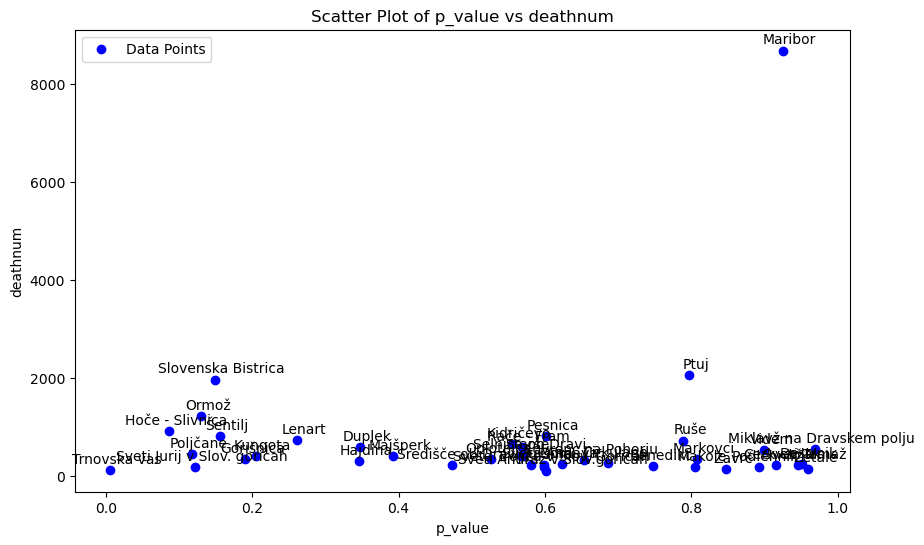

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_livingplace['p_value'], df_livingplace['deathnum'], color='blue', label='Data Points')

# title
plt.xlabel('p_value')
plt.ylabel('deathnum')
plt.title('Scatter Plot of p_value vs deathnum')
plt.legend()
# label
for i, row in df_livingplace.iterrows():
    plt.annotate(row['livingplace'], (row['p_value'], row['deathnum']), textcoords="offset points", xytext=(5,5), ha='center')
# show the graph
plt.show()


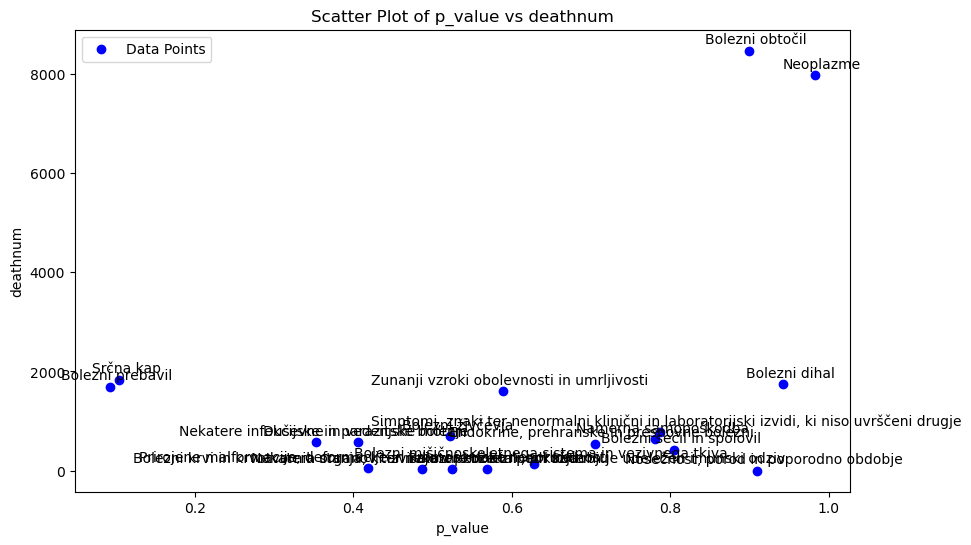

In [13]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cause['p_value'], df_cause['deathnum'], color='blue', label='Data Points')

# title
plt.xlabel('p_value')
plt.ylabel('deathnum')
plt.title('Scatter Plot of p_value vs deathnum')
plt.legend()
# label
for i, row in df_cause.iterrows():
    plt.annotate(row['cause'], (row['p_value'], row['deathnum']), textcoords="offset points", xytext=(5,5), ha='center')

# show the graph
plt.show()

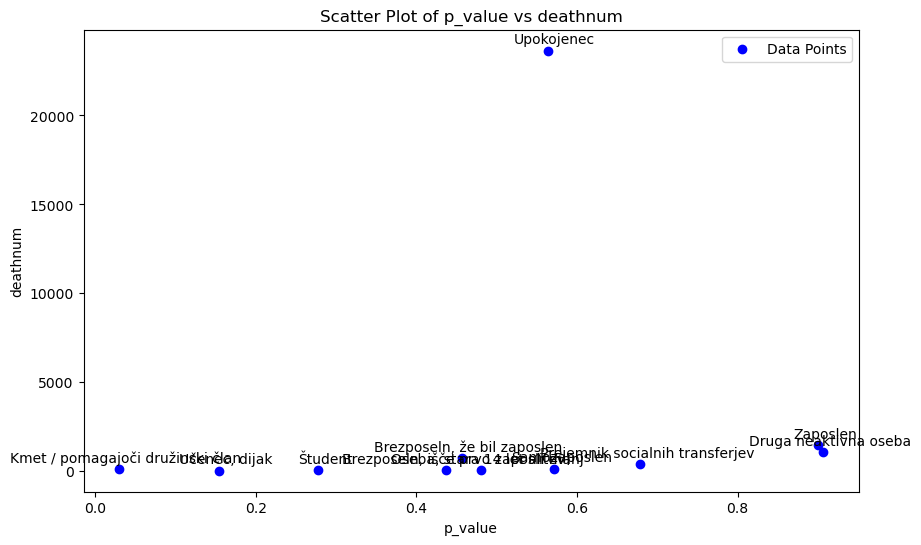

In [14]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_status['p_value'], df_status['deathnum'], color='blue', label='Data Points')

# title
plt.xlabel('p_value')
plt.ylabel('deathnum')
plt.title('Scatter Plot of p_value vs deathnum')
plt.legend()
# label
for i, row in df_status.iterrows():
    plt.annotate(row['status'], (row['p_value'], row['deathnum']), textcoords="offset points", xytext=(5,5), ha='center')

plt.show()

In [15]:
slovar_seznamov

{'livingplace': ['Benedikt',
  'Cerkvenjak',
  'Cirkulane',
  'Destrnik',
  'Dornava',
  'Duplek',
  'Gorišnica',
  'Hajdina',
  'Hoče - Slivnica',
  'Juršinci',
  'Kidričevo',
  'Kungota',
  'Lenart',
  'Lovrenc na Pohorju',
  'Majšperk',
  'Makole',
  'Maribor',
  'Markovci',
  'Miklavž na Dravskem polju',
  'Oplotnica',
  'Ormož',
  'Pesnica',
  'Podlehnik',
  'Poljčane',
  'Ptuj',
  'Rače - Fram',
  'Ruše',
  'Selnica ob Dravi',
  'Slovenska Bistrica',
  'Središče ob Dravi',
  'Starše',
  'Sveta Ana',
  'Sveta Trojica v Slov. Goricah',
  'Sveti Andraž v Slov.goricah',
  'Sveti Jurij v Slov. goricah',
  'Sveti Tomaž',
  'Trnovska vas',
  'Videm',
  'Zavrč',
  'Šentilj',
  'Žetale'],
 'cause': ['Bolezni dihal',
  'Bolezni kože in podkožja',
  'Bolezni krvi in krvotvornih organov ter nekatere bolezni, pri katerih je udeležen imunski odziv',
  'Bolezni mišičnoskeletnega sistema in vezivnega tkiva',
  'Bolezni obtočil',
  'Bolezni prebavil',
  'Bolezni sečil in spolovil',
  'Bolezni živ

In [16]:
temperature_data

,postaja,t7,t14,t21,tpov,tmax,tmin,date,90th_centile,25th_centile,75th_centile,dan_prek_90_centil,heatwave
0,311,-0.6,4.5,0.3,1.1,5.7,-1.3,2012-01-01,10.35,7.125,9.500,False,False
1,311,-1.6,11.0,9.3,7.0,11.4,-2.3,2012-01-02,10.32,6.600,9.400,True,False
2,311,5.8,8.0,5.4,6.2,10.5,3.2,2012-01-03,10.29,6.775,9.350,True,False
3,311,0.4,9.2,2.6,3.7,10.2,0.0,2012-01-04,10.26,6.950,9.300,False,False
4,311,2.9,7.0,3.7,4.3,7.3,-1.9,2012-01-05,10.23,6.675,9.250,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,311,-5.4,-0.3,-1.2,-2.0,-0.3,-5.8,2020-12-27,8.92,2.975,6.525,False,False
3284,311,0.9,2.3,1.4,1.5,3.0,-1.3,2020-12-28,9.34,2.950,6.550,False,False
3285,311,6.0,5.4,5.2,5.4,6.9,0.6,2020-12-29,9.76,2.925,6.575,False,False
3286,311,2.9,8.5,4.0,4.8,8.5,1.8,2020-12-30,10.18,2.900,6.600,False,False


In [17]:
death_data

,year,date,cause,livingplace,status,deathnum
0,2012,2012-01-01,Bolezni dihal,NaN,NaN,0
1,2012,2012-01-01,Bolezni kože in podkožja,NaN,NaN,0
2,2012,2012-01-01,Bolezni krvi in krvotvornih organov ter nekate...,NaN,NaN,0
3,2012,2012-01-01,Bolezni mišičnoskeletnega sistema in vezivnega...,NaN,NaN,0
4,2012,2012-01-01,Bolezni obtočil,Miklavž na Dravskem polju,Upokojenec,do 5
...,...,...,...,...,...,...
74759,2020,2020-12-31,"Nosečnost, porod in poporodno obdobje",NaN,NaN,0
74760,2020,2020-12-31,"Prirojene malformacije, deformacije in kromoso...",NaN,NaN,0
74761,2020,2020-12-31,"Simptomi, znaki ter nenormalni klinični in lab...",NaN,NaN,0
74762,2020,2020-12-31,Srčna kap,Rače - Fram,Upokojenec,do 5


train a binary classifier

In [18]:
tmp1 = death_data.groupby("date").size().values
death_data = death_data.drop_duplicates(subset="date").assign(Count=tmp1)
death_data.loc[death_data['deathnum'] == 0,'Count'] = 0

In [19]:
merged_df = pd.merge(temperature_data,death_data,on='date',how='outer')
merged_df

,postaja,t7,t14,t21,tpov,tmax,tmin,date,90th_centile,25th_centile,75th_centile,dan_prek_90_centil,heatwave,year,cause,livingplace,status,deathnum,Count
0,311,-0.6,4.5,0.3,1.1,5.7,-1.3,2012-01-01,10.35,7.125,9.500,False,False,2012.0,Bolezni dihal,NaN,NaN,0,0.0
1,311,-1.6,11.0,9.3,7.0,11.4,-2.3,2012-01-02,10.32,6.600,9.400,True,False,2012.0,Bolezni dihal,NaN,NaN,0,0.0
2,311,5.8,8.0,5.4,6.2,10.5,3.2,2012-01-03,10.29,6.775,9.350,True,False,2012.0,Bolezni dihal,Hoče - Slivnica,Upokojenec,do 5,24.0
3,311,0.4,9.2,2.6,3.7,10.2,0.0,2012-01-04,10.26,6.950,9.300,False,False,2012.0,Bolezni dihal,NaN,NaN,0,0.0
4,311,2.9,7.0,3.7,4.3,7.3,-1.9,2012-01-05,10.23,6.675,9.250,False,False,2012.0,Bolezni dihal,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,311,-5.4,-0.3,-1.2,-2.0,-0.3,-5.8,2020-12-27,8.92,2.975,6.525,False,False,2020.0,Bolezni dihal,Oplotnica,Upokojenec,do 5,31.0
3284,311,0.9,2.3,1.4,1.5,3.0,-1.3,2020-12-28,9.34,2.950,6.550,False,False,2020.0,Bolezni dihal,NaN,NaN,0,0.0
3285,311,6.0,5.4,5.2,5.4,6.9,0.6,2020-12-29,9.76,2.925,6.575,False,False,2020.0,Bolezni dihal,NaN,NaN,0,0.0
3286,311,2.9,8.5,4.0,4.8,8.5,1.8,2020-12-30,10.18,2.900,6.600,False,False,2020.0,Bolezni dihal,NaN,NaN,0,0.0


In [20]:
cls_data = merged_df[['heatwave','cause', 'Count']].copy() #'livingplace','status',
cls_data

,heatwave,cause,Count
0,False,Bolezni dihal,0.0
1,False,Bolezni dihal,0.0
2,False,Bolezni dihal,24.0
3,False,Bolezni dihal,0.0
4,False,Bolezni dihal,0.0
...,...,...,...
3283,False,Bolezni dihal,31.0
3284,False,Bolezni dihal,0.0
3285,False,Bolezni dihal,0.0
3286,False,Bolezni dihal,0.0


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
# fill in the lost value
cls_data.fillna(value={"cause": "Unknown",  "Count":0}, inplace=True) # "livingplace": "Unknown", "status": "Unknown",

label_encoders = {}
for col in ['cause']: # , 'livingplace', 'status'
    le = LabelEncoder()
    cls_data[col] = le.fit_transform(cls_data[col])
    label_encoders[col] = le

# devide features and aim variables
X = cls_data.drop('Count', axis=1)
y = cls_data['Count']

# training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialized the classifier
classifier = RandomForestClassifier(random_state=42)

# train the classifier
classifier.fit(X_train, y_train)

# prediction on the test set
y_pred = classifier.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.58


When training results involve multiple features, one visualization method is to plot the importance of features. Since a random forest classifier can provide importance scores for features, we can use these scores to create a bar chart that displays the contribution of each feature to the classifier.

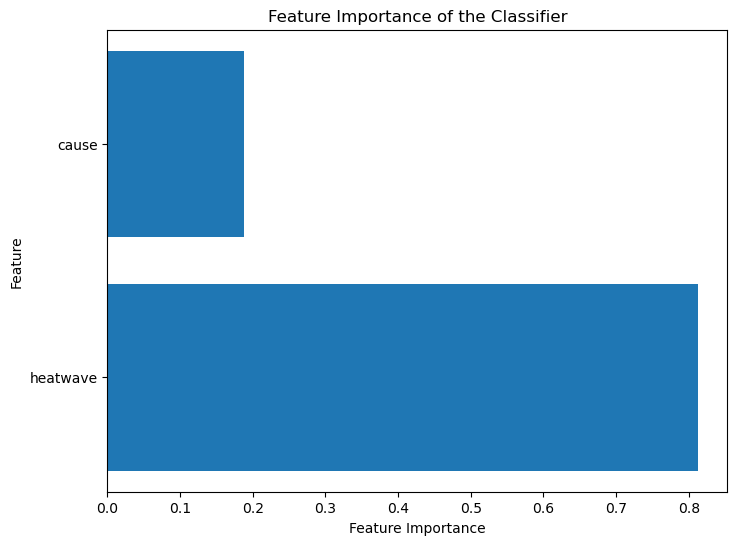

In [23]:
# get important features
feature_importances = classifier.feature_importances_

# features' name
feature_names = X.columns

# create a bar chart which indicates the feature importance of the classifier
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of the Classifier')
plt.show()

In [24]:
pip freeze > wenxinrequirements.txt

Note: you may need to restart the kernel to use updated packages.
